In [1]:
%load_ext autoreload
%autoreload 2

import markovlink
import numpy as np
import numpy.random as npr
import scipy as sp
import pickle
import matplotlib.pylab as plt
import sys

%matplotlib inline

import matplotlib
# matplotlib.rc('text', usetex=False)  # <-- try this if plots don't work
matplotlib.rc('text', usetex=True) # <-- use this if your matplotlib is set up to play nice with latex

# simulation results

### a simple example

We first create a parameters we can simulate from:

In [2]:
# pick the number of populations and the number of different values that can be returned by each tool
num_ells=20
num_xs=6
num_ys=6

plx_star = np.array([npr.dirichlet(np.ones(num_xs)) for x in range(num_ells)])
qxy_star = np.array([npr.dirichlet(np.ones(num_ys)) for x in range(num_xs)])
hly_star= plx_star @qxy_star

Let's take a look at what we've made

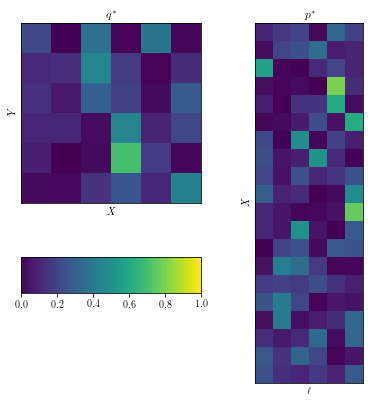

In [11]:
plt.gcf().set_size_inches(5,5)

plt.gcf().add_axes([0,.5,.5,.5])
plt.pcolor(qxy_star,vmin=0,vmax=1)
plt.title("$q^*$"); plt.xticks([]); plt.yticks([])
plt.xlabel("$X$")
plt.ylabel("$Y$")

plt.gcf().add_axes([.65,0,plx_star.shape[1]/plx_star.shape[0],1])
mappable=plt.pcolor(plx_star,vmin=0,vmax=1)
plt.title("$p^*$"); plt.xticks([]); plt.yticks([])
plt.xlabel("$\ell$")
plt.ylabel("$X$")

plt.gcf().add_axes([0,.25,.5,.1])
plt.colorbar(cax=plt.gca(),orientation='horizontal')


Now we simulate data:

In [12]:
nsamps=100
Nlx=np.array([npr.multinomial(nsamps,x) for x in plx_star])
Nly=np.array([npr.multinomial(nsamps,x) for x in hly_star])

And run the MLM get our point estimate $\hat q$ and our credible intervals.

In [13]:
qhat,CIs = markovlink.estimates(Nlx,Nly)

Let's see how our estimates stack up to the truth

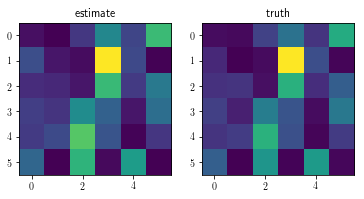

In [14]:
plt.subplot(1,2,1)
plt.imshow(qhat)
plt.title("estimate")
plt.subplot(1,2,2)
plt.imshow(qxy_star)
plt.title("truth");

We can see that $q^*$ and $\tilde q$ look fairly similar in basic character.  We can measure their difference quantitatively, through the total variation distance averaged over the rows.  This error measurement ranges from 0 to 1.

In [15]:
markovlink.totalvardist(qhat,qxy_star)

0.06674777214212717

Anyway, not terrible error.

Now let's look at the credible intervals.  It is hard to visualize the results for every the parameters at once.  Let's just look at a single row of $q$.

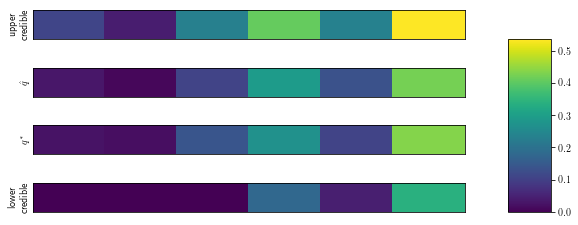

In [16]:
xtilde=0


mx=CIs[[xtilde],:,1].max()

plt.gcf().add_axes([0,.6,1,.1])
plt.ylabel("upper\n credible"); plt.xticks([]); plt.yticks([])
plt.pcolor(CIs[[xtilde],:,1],vmin=0,vmax=mx)

plt.gcf().add_axes([0,.4,1,.1])
plt.ylabel("$\hat q$"); plt.xticks([]); plt.yticks([])
plt.pcolor(qhat[[xtilde]],vmin=0,vmax=mx)

plt.gcf().add_axes([0,.2,1,.1])
plt.ylabel("$q^*$"); plt.xticks([]); plt.yticks([])
plt.pcolor(qxy_star[[xtilde]],vmin=0,vmax=mx)

plt.gcf().add_axes([0,0,1,.1])
plt.ylabel("lower\n credible"); plt.xticks([]); plt.yticks([])
mappable=plt.pcolor(CIs[[xtilde],:,0],vmin=0,vmax=mx)

plt.gcf().add_axes([1.1,0,.1,.6])
plt.colorbar(mappable=mappable,cax=plt.gca())

Looks sensible.  The truth is certainly between the lower and upper.  

### another example: MANY samples but not many sampling kinds

In [25]:
# pick the number of populations and the number of different values that can be returned by each tool
num_ells=4
num_xs=6
num_ys=6

plx_star = np.array([npr.dirichlet(np.ones(num_xs)) for x in range(num_ells)])
qxy_star = np.array([npr.dirichlet(np.ones(num_ys)) for x in range(num_xs)])
hly_star= plx_star @qxy_star

nsamps=100000000
Nlx=np.array([npr.multinomial(nsamps,x) for x in plx_star])
Nly=np.array([npr.multinomial(nsamps,x) for x in hly_star])



With fewer subpopulations, even if we add many more samples, the error is higher:

In [26]:
qhat,CIs = markovlink.estimates(Nlx,Nly,verbose=True)
print("err",markovlink.totalvardist(qhat,qxy_star))


 100 samples to produce: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
 36 parameters look at: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 err 0.0798220675015011


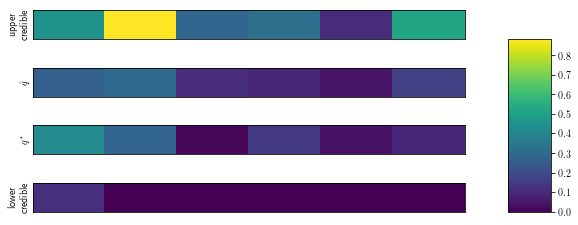

In [27]:
xtilde=0

mx=CIs[[xtilde],:,1].max()

plt.gcf().add_axes([0,.6,1,.1])
plt.ylabel("upper\n credible"); plt.xticks([]); plt.yticks([])
plt.pcolor(CIs[[xtilde],:,1],vmin=0,vmax=mx)

plt.gcf().add_axes([0,.4,1,.1])
plt.ylabel("$\hat q$"); plt.xticks([]); plt.yticks([])
plt.pcolor(qhat[[xtilde]],vmin=0,vmax=mx)

plt.gcf().add_axes([0,.2,1,.1])
plt.ylabel("$q^*$"); plt.xticks([]); plt.yticks([])
plt.pcolor(qxy_star[[xtilde]],vmin=0,vmax=mx)

plt.gcf().add_axes([0,0,1,.1])
plt.ylabel("lower\n credible"); plt.xticks([]); plt.yticks([])
mappable=plt.pcolor(CIs[[xtilde],:,0],vmin=0,vmax=mx)

plt.gcf().add_axes([1.1,0,.1,.6])
plt.colorbar(mappable=mappable,cax=plt.gca())

Notice that in this experiment the estimator $\hat q$ is sometimes be pretty off-base, but the credible intervals still generally contain the truth, $q^*$.

### test: how does MLM depend upon with different amounts of data and subpopulations?

change number of subpops and number of samples.  look at error, along with coverage for the credibleinterval of `q[0,0]`.

In [28]:
num_subpops=[2,4,6,10,15,20]
num_samps=np.require(10*np.exp(np.r_[0:11:100j]),dtype=np.int)
# num_samps=np.require(10*np.exp(np.r_[0:11:10j]),dtype=np.int)

num_xs=6
num_ys=6

actual_numsamps=np.zeros((len(num_subpops),len(num_samps)))
error=np.zeros((len(num_subpops),len(num_samps)))
CIinfo=np.ones((len(num_subpops),len(num_samps),3))*np.nan
pointests=np.ones((len(num_subpops),len(num_samps)))*np.nan

In [29]:
# # this is /slow:
# for i,num_subpop in enumerate(num_subpops):   
#     print("\n",i,":",num_subpop)
#     for j,num_samp in enumerate(num_samps):
#         markovlink.pnn(j)
#         plx_star = np.array([npr.dirichlet(np.ones(num_xs)) for x in range(num_subpop)])
#         qxy_star = np.array([npr.dirichlet(np.ones(num_ys)) for x in range(num_xs)])
#         hly_star= plx_star @qxy_star

#         nsamps=5+num_samp//num_subpop
#         Nlx=np.array([npr.multinomial(nsamps,x) for x in plx_star])
#         Nly=np.array([npr.multinomial(nsamps,x) for x in hly_star])

#         qhat,CIs = markovlink.estimates(Nlx,Nly,subCIs=[((0,0))],nsamps=10)
        
#         CIinfo[i,j,:2]=CIs[0]
#         CIinfo[i,j,2]=qxy_star[0,0]
#         pointests[i,j]=qhat[0,0]
#         error[i,j]=markovlink.misc.totalvardist(qhat,qxy_star)
#         actual_numsamps[i,j]=nsamps*2*num_subpop
        

# with open('data/simulation_cis.pkl','wb') as f:
#     pickle.dump(dict(actual_numsamps=actual_numsamps,error=error,CIinfo=CIinfo,pointests=pointests),f)

# # here we saved the results
with open('data/simulation_cis.pkl','rb') as f:
    locals().update(pickle.load(f))

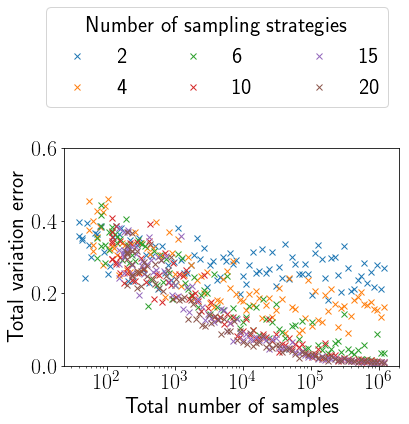

In [30]:
matplotlib.rc('font', size=22)

for i,num_subpop in enumerate(num_subpops):
    plt.semilogx(actual_numsamps[i],error[i],'x',label='%d'%num_subpop,alpha=1.0)

plt.xlabel("Total number of samples")
plt.ylabel("Total variation error")
plt.ylim(0,.6)


plt.legend(ncol=3,bbox_to_anchor=[1.0,1.7],title="Number of sampling strategies")

plt.savefig("images/simulationI.png",dpi=300,bbox_inches='tight')

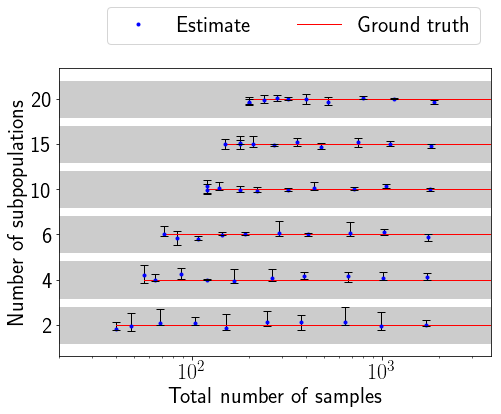

In [31]:


plt.gcf().add_axes([1.3,0,1,1])

sizes=CIinfo[:,:,1]-CIinfo[:,:,0]

SM=2.5

# sampslice=slice(0,len(num_samps),7)
# sampslice=slice(0,len(num_samps))
sampslice=np.require(np.r_[0:40:10j],dtype=np.int)

for GG,num_subpop in enumerate(num_subpops):
   
    
    xs=[0,actual_numsamps.max()*2]
    ys1=[GG*SM-1,GG*SM-1]
    ys2=[GG*SM+1,GG*SM+1]
    plt.fill_between(xs,ys1,ys2,color='#cccccc')
    
    truths=plt.plot([actual_numsamps[GG][0],actual_numsamps[GG][-1]],[GG*SM,GG*SM],'r-',linewidth=1)

    yerrs=np.array([CIinfo[GG,:,2]-CIinfo[GG,:,0],CIinfo[GG,:,1]-CIinfo[GG,:,2]])
    yerrs2=np.array([CIinfo[GG,:,2]-0,1-CIinfo[GG,:,2]])
    
    yerrs3=pointests[GG]-CIinfo[GG,:,2]
    
    ests=plt.plot(actual_numsamps[GG][sampslice],yerrs3[sampslice]+GG*SM,'b.')

    ticks=plt.errorbar(actual_numsamps[GG][sampslice], GG*SM+np.zeros(len(actual_numsamps[GG]))[sampslice], 
                    yerr=yerrs[:,sampslice],capsize=4,linewidth=1,capthick=1,linestyle='',color='black')
#     plt.errorbar(actual_numsamps[GG][::7], GG*2+np.zeros(len(actual_numsamps[GG]))[::7], 
#                     yerr=yerrs2[:,::7],capsize=0,linewidth=1,linestyle=' ',color='blue')
    
    
plt.xlim(actual_numsamps[0][sampslice][0]*.5,actual_numsamps[-1][sampslice][-1]*2)
        
plt.legend([ests[0],truths[0]],['Estimate','Ground truth'],bbox_to_anchor=[1.0,1.25],ncol=2)

plt.gca().set_xscale("log", nonposx='clip')
        
plt.yticks(SM*np.r_[0:len(num_subpops)],num_subpops)

plt.xlabel("Total number of samples")
plt.ylabel("Number of subpopulations")
    
    
plt.savefig("images/simulationIconf.png",dpi=300,bbox_inches='tight')

### test: varying the nature of the link

In [32]:
num_ells=4
num_xs=6
num_ys=num_xs

# we will use the same plx throughout
plx_star = np.array([npr.dirichlet(np.ones(num_xs)*1) for x in range(num_ells)])

# in each sub-experimetn will be a convex combination between AA and BB
AA=np.eye(num_xs)
BB=np.zeros((num_xs,num_xs)); BB[:]=npr.dirichlet(np.ones(num_xs)).reshape((1,-1))

In [33]:
# convexs index the progression from independent to deterministic
convexs=np.r_[0:1:500j][1:-1]

# nsamps are the different number of samples we use
nsamps=[5,50,500,5000]

In [34]:

# this is slow
# # we keep track of the error for each q and each number of samples
# errs=np.zeros((len(convexs),len(nsamps)))

# # iterate through the possible values of q
# for i,conv in enumerate(convexs):
#     markovlink.misc.pnn(i)
    
#     # make the q parameters as a function of conv
#     qxy_star = AA*conv+(1-conv)*BB
#     hly_star= plx_star @qxy_star
    
#     # for each number of samples, simulate a dataset of that size, 
#     # estimate q from the dataset, and report the error
#     for j,nsamp in enumerate(nsamps):
#         Nlx=np.array([npr.multinomial(nsamp,x) for x in plx_star])
#         Nly=np.array([npr.multinomial(nsamp,x) for x in hly_star])
#         ptilde,qtilde= markovlink.point_estimates(Nlx,Nly,maxtime=120)
#         errs[i,j]=markovlink.misc.totalvardist(qtilde,qxy_star)
    
# with open('data/simulation_varylink.pkl','wb') as f:
#     pickle.dump(dict(errs=errs,nsamps=nsamps,convexs=convexs,AA=AA,BB=BB,plx_star=plx_star),f)
                
# # here we saved the results
with open('data/simulation_varylink.pkl','rb') as f:
    locals().update(pickle.load(f))
    

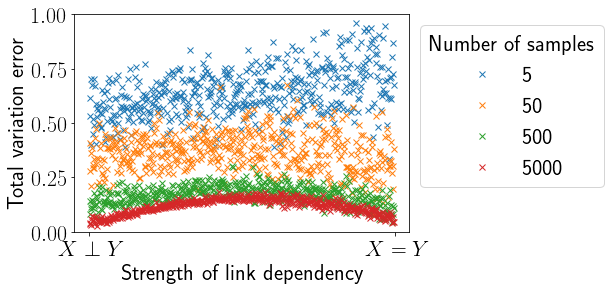

In [35]:
matplotlib.rc('font', size=22)

for j,nsamp in enumerate(nsamps):
    plt.plot(convexs,errs[:,j],'x',label='%d'%nsamp,alpha=1.0)
plt.ylim(0,1.0)
plt.ylabel("Total variation error")
plt.xticks([0,1],['$X\\perp Y$','$X=Y$'])
plt.xlabel("Strength of link dependency")
plt.legend(ncol=1,bbox_to_anchor=[1.0,1.0],title='Number of samples')
plt.savefig('images/simulationII.png',dpi=300,bbox_inches='tight')

# allen institute results

In [36]:
# example input: two matrices, Nly and Nlx
with open('data/tables.pkl','rb') as f:
    locals().update(pickle.load(f))

Our original data comes in the form of two tables.

The first table, `Nlx`, gives the result of running technique I one some data.  This technique takes in a given specimen and returns one of a finite number of different responses, each of which tells us something different about the specimen.  In this case, these responses corresponded to guesses about the cell type of the specimens, which were cells.  In general, any measurement tool that gives one of a discrete number of responses can be used (or, if the response is continuous, we can bin responses to make them discrete).  

To be concrete: `Nlx[l,x]` gives the  the number of samples from subpopulation `l` that that measured as `x` by technique I.  We expect `Nlx` to be a numpy matrix.  

Our input data also has 
- `cre_names`, which gives the name of each subpopulation
- `facs_names`, which gives the name of each possible `x` measurement
- `patch_names`, which gives the name of each possible `y` measurement

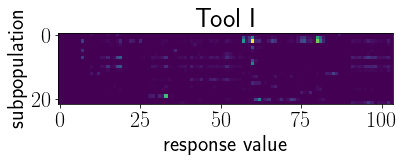

In [37]:
plt.imshow(Nlx); plt.ylabel('subpopulation'); plt.xlabel("response value");
plt.title("Tool I");

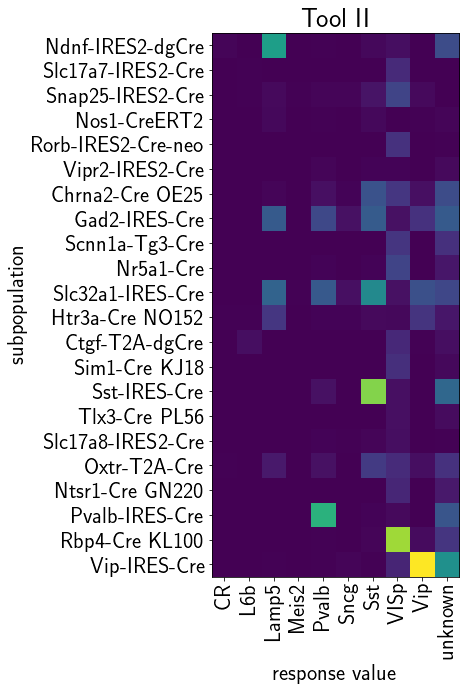

In [38]:
plt.imshow(Nly); 
plt.ylabel('subpopulation'); plt.xlabel("response value"); 
plt.title("Tool II")
plt.gcf().set_size_inches(10,10)
plt.yticks(range(len(cre_names)),[s.replace('_',' ') for s in cre_names])
plt.xticks(range(len(patch_names)),patch_names,rotation='vertical');

In no case was the *same specimen* observed using both techniques.  However, both techniques sampled from the same set of subpopulations.  Using a Markov Link assumption, this enables us to determine a set of possible calibrations, or correspondences between the two methods.

Here we draw a picture showing a close up of some of these tables:

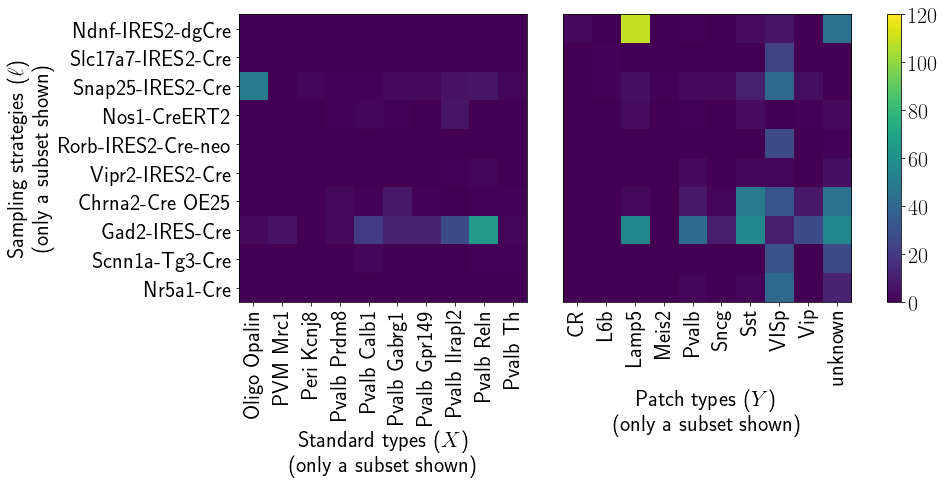

In [39]:
NSUB=np.r_[25:35]
CRESUB=np.r_[:10]
prop=.04
plt.gcf().add_axes([0,0,len(NSUB)*prop,len(CRESUB)*prop])
plt.imshow(Nlx[CRESUB][:,NSUB],vmin=0,vmax=120); 
plt.ylabel('Sampling strategies ($\ell$) \n (only a subset shown)'); plt.xlabel("Response value");
plt.xlabel("Standard types ($X$) \n (only a subset shown)")
plt.gcf().set_size_inches(25,10)
plt.yticks(range(len(CRESUB)),[s.replace('_',' ') for s in cre_names[CRESUB]])
plt.xticks(range(len(NSUB)),[s.replace('_',' ') for s in facs_names[NSUB]],rotation='vertical')

plt.gcf().add_axes([len(NSUB)*prop+.05,0,Nly.shape[1]*prop,len(CRESUB)*prop])
foo=plt.imshow(Nly[CRESUB],vmin=0,vmax=120); 
plt.gcf().set_size_inches(10,10)
plt.yticks([])
plt.xticks(range(len(patch_names)),patch_names,rotation='vertical');
plt.xlabel("Patch types ($Y$) \n (only a subset shown)")

plt.gcf().add_axes([len(NSUB)*prop+.05+Nly.shape[1]*prop+.05,0,.02,len(CRESUB)*prop])
plt.colorbar(mappable=foo,cax=plt.gca())

plt.savefig("images/allenNlxy.png",dpi=300,bbox_inches='tight')

### run the MLM

In [40]:
# this is slow:
# qhat,CIs=markovlink.estimates(Nlx,Nly,onfail='warn',verbose=True,nsamps=100)
# with open('data/allen_results.pkl','wb') as f:
#     pickle.dump(dict(qhat=qhat,CIs=CIs),f)

# here we saved the reult:
with open('data/allen_results.pkl','rb') as f:
    locals().update(pickle.load(f))
    good=np.isnan(CIs).any(axis=2) # <-- some of the LPs fail to solve for some reason.  
    CIs[~good][:,0]=0              # when that happens we throw up our hands
    CIs[~good][:,1]=1              # and assume the widest possible interval, i.e. [0,1]

### Look at the results

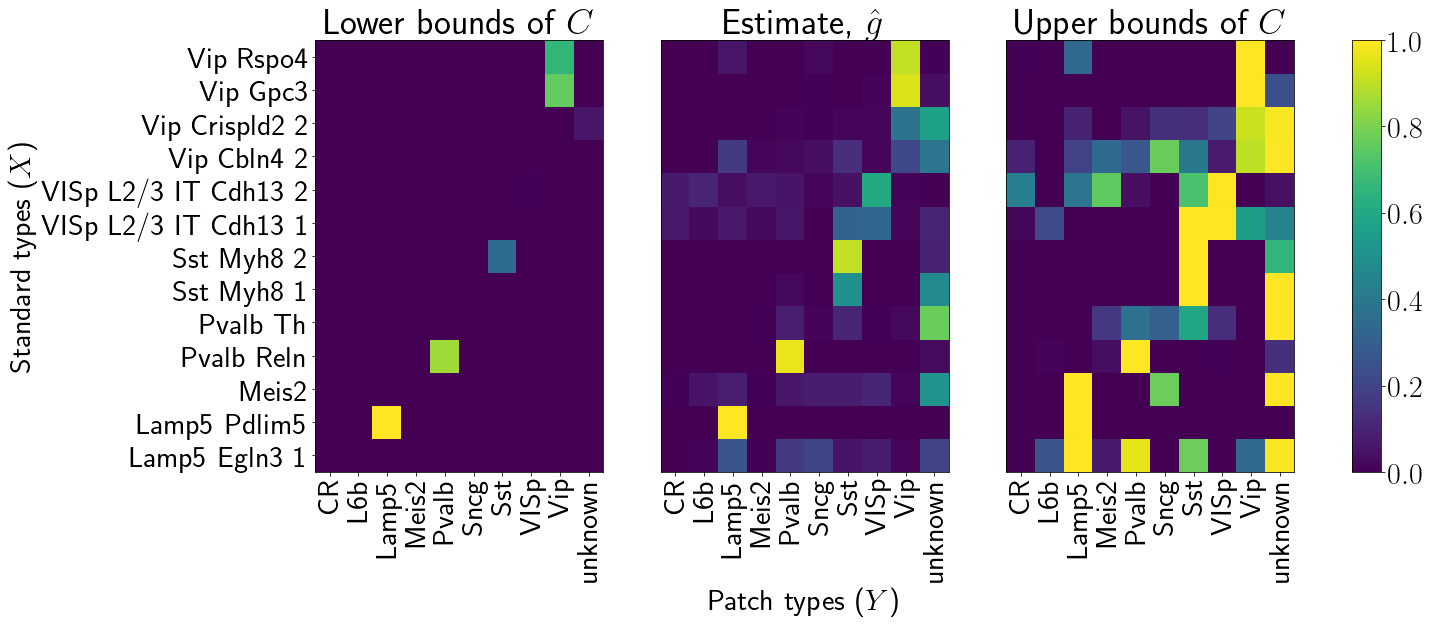

In [41]:
matplotlib.rc('font', size=30)
plt.gcf().set_size_inches(4,6)

# select a subset of Standard types
NSUB=[13,18,21,33,34,51,52,58,59,93,95,96,102]

plt.gcf().add_axes([0,0,1,1])
plt.pcolor(CIs[NSUB,:,0],vmin=0,vmax=1)
plt.xticks(np.r_[0:len(patch_names)]+.5,patch_names,rotation='vertical');
plt.yticks(np.r_[0:len(NSUB)]+.5,[x.replace('_'," ") for x in facs_names[NSUB]]);
# plt.xlabel("Patch types ($Y$)")
plt.ylabel("Standard types ($X$)")
plt.title("Lower bounds of $C$")

plt.gcf().add_axes([1.2,0,1,1])
plt.pcolor(qhat[NSUB,:],vmin=0,vmax=1)
plt.xticks(np.r_[0:len(patch_names)]+.5,patch_names,rotation='vertical'); plt.yticks([])
plt.xlabel("Patch types ($Y$)")
plt.title("Estimate, $\\hat g$")

plt.gcf().add_axes([2.4,0,1,1])
mappable=plt.pcolor(CIs[NSUB,:,1],vmin=0,vmax=1)
plt.xticks(np.r_[0:len(patch_names)]+.5,patch_names,rotation='vertical'); plt.yticks([])
# plt.xlabel("Patch types ($Y$)");
plt.title("Upper bounds of $C$")

plt.gcf().add_axes([3.6,0,.1,1])
plt.colorbar(mappable=mappable,cax=plt.gca())

plt.savefig("images/allenout.png",dpi=300,bbox_inches='tight')

### Test: how far away are the pseudoposteriors from being consistent with the MLM?

In [28]:
samps=markovlink.approxbayes.projection_check(Nlx,Nly,nsamps=100,verbose=True)


 100 samples to produce: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

(array([ 1.,  1.,  2., 14., 21., 18., 21., 16.,  3.,  3.]),
 array([0.09913639, 0.10439902, 0.10966166, 0.11492429, 0.12018692,
        0.12544955, 0.13071218, 0.13597481, 0.14123744, 0.14650008,
        0.15176271]),
 <a list of 10 Patch objects>)

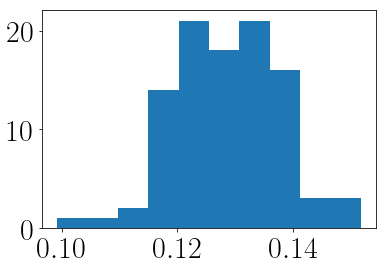

In [29]:
dsts=[]
for (p,q,h) in samps:
    dsts.append(markovlink.misc.totalvardist(p@q,h))
plt.hist(dsts)

0.02809623901950571 	 0.1951930838188627
0.02428598675720915 	 0.2061014163126167
0.02400801684733118 	 0.17644692164891684
0.023881818335065783 	 0.1553870574283851


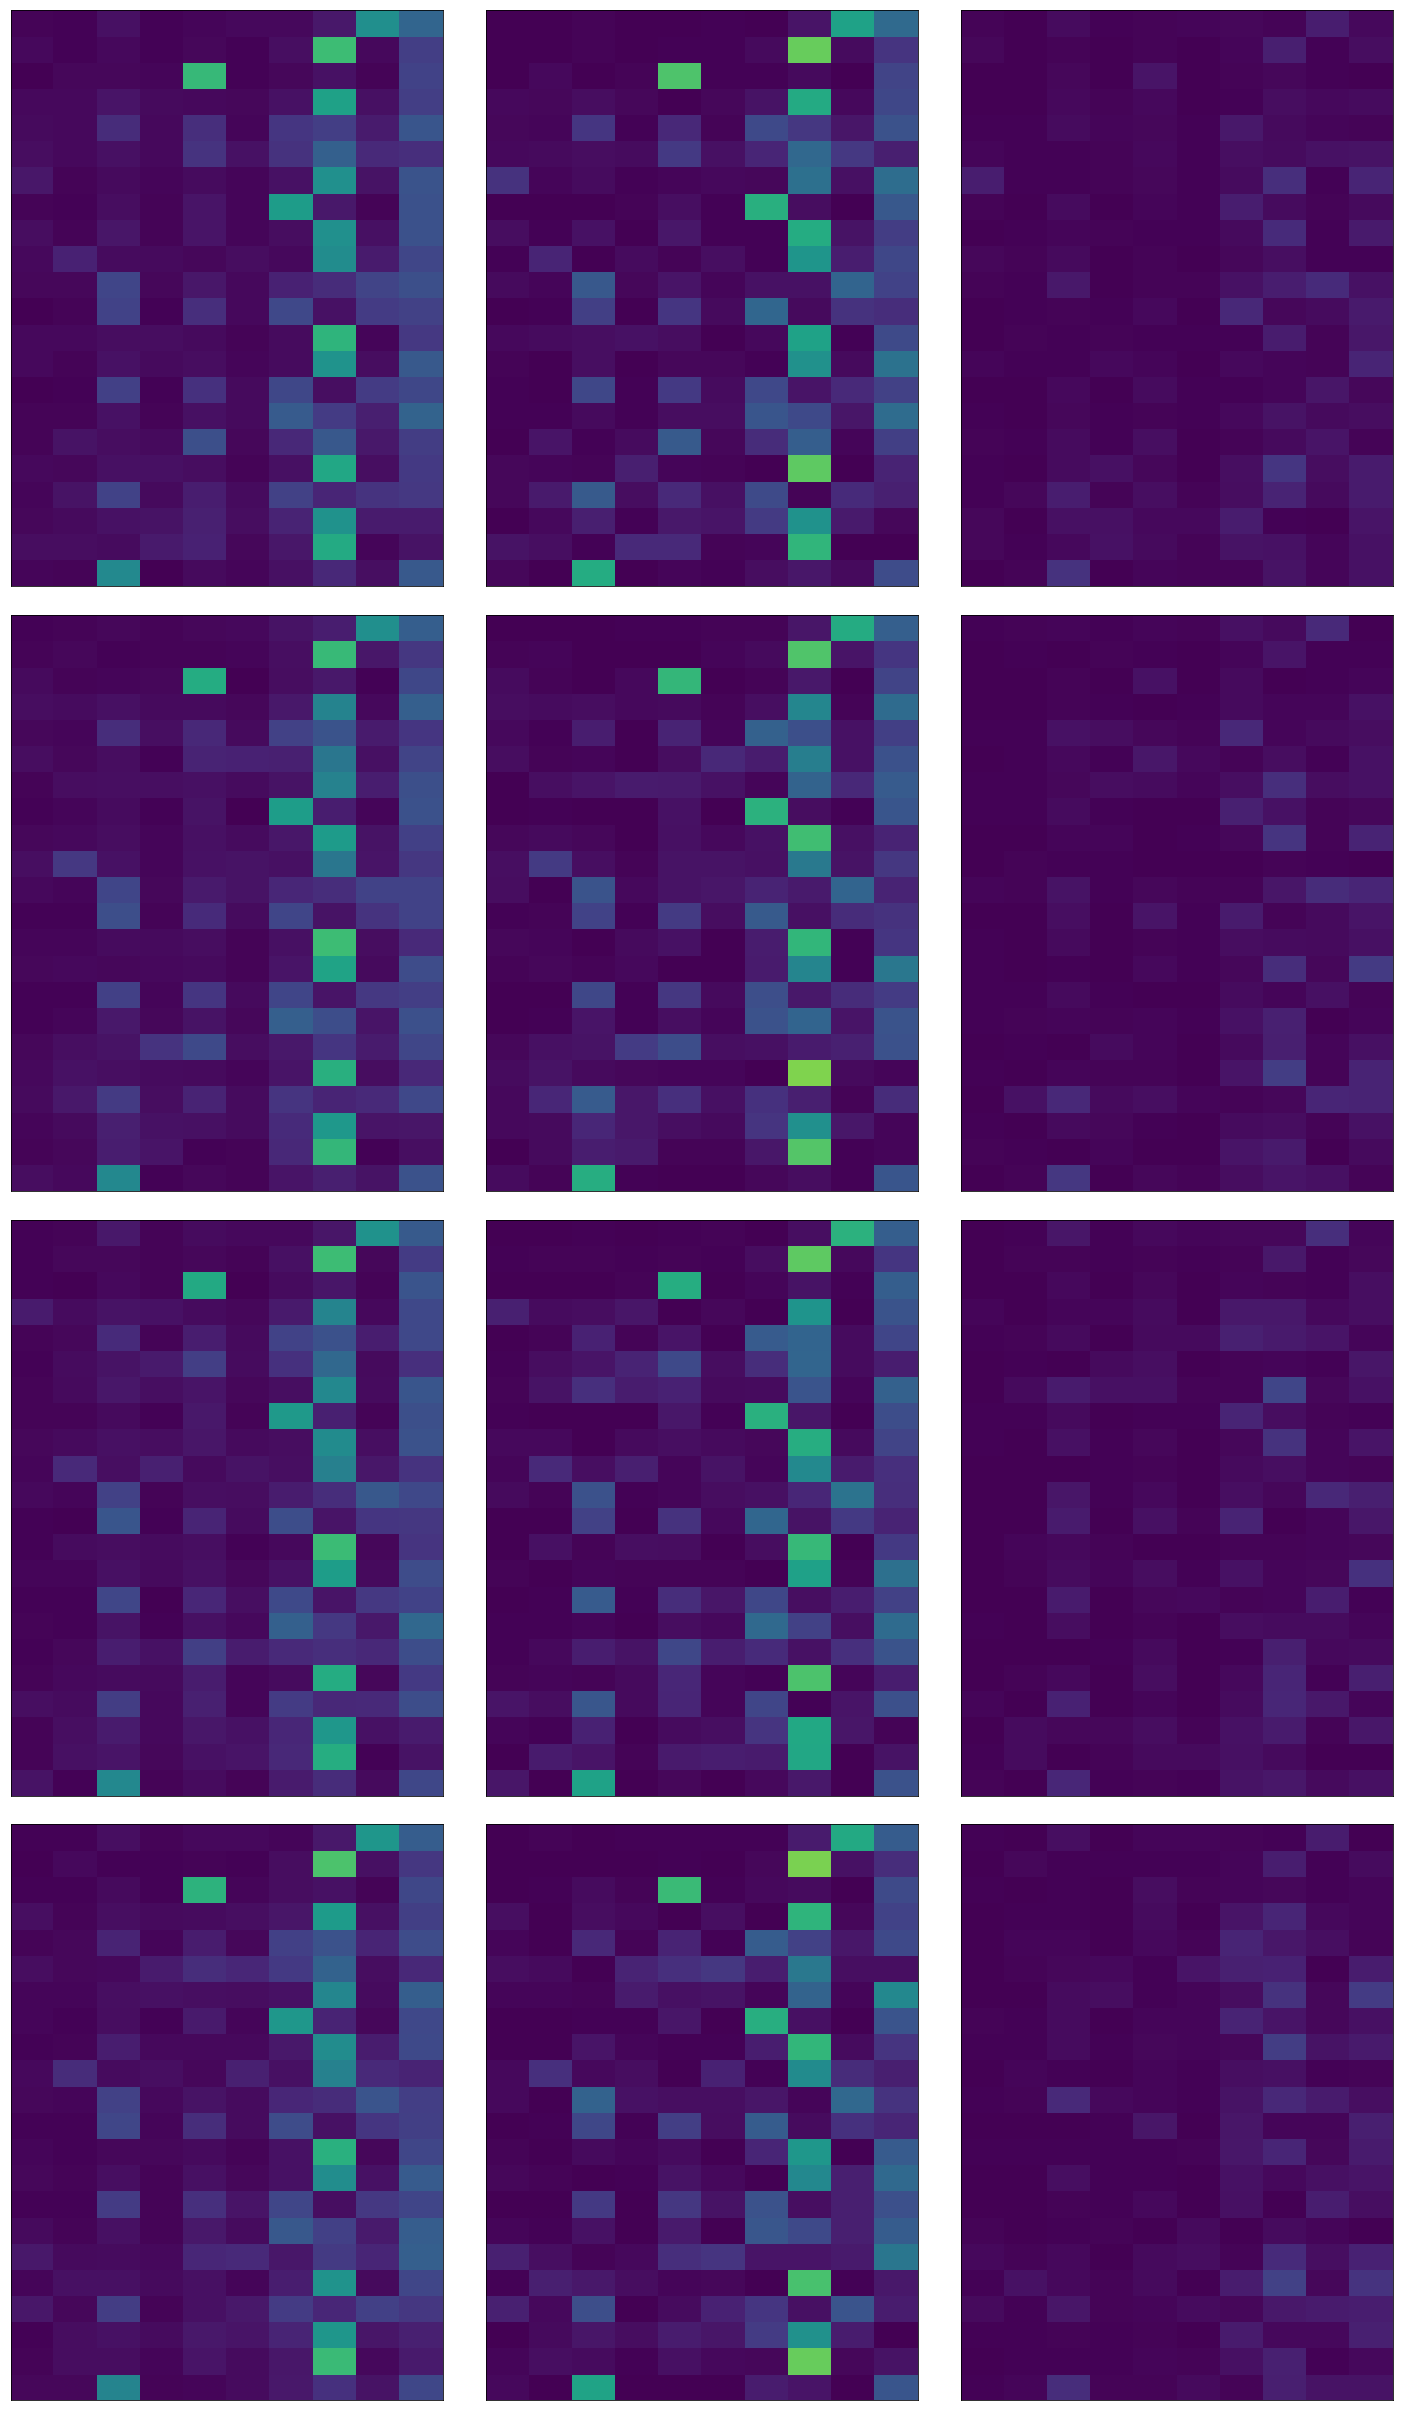

In [58]:

for i,(p,q,h) in enumerate(samps[:4]):
    print(np.mean(np.abs(p@q-h)),"\t",np.max(np.abs(p@q-h)))
    plt.gcf().add_axes([0,i*2.1,1,2])
    plt.pcolor((p@q),vmin=0,vmax=1); plt.xticks([]); plt.yticks([])
    plt.gcf().add_axes([1.1,i*2.1,1,2])
    plt.pcolor(h,vmin=0,vmax=1);  plt.xticks([]); plt.yticks([])
    plt.gcf().add_axes([2.2,i*2.1,1,2])
    mappable=plt.pcolor(np.abs(h-p@q),vmin=0,vmax=1);  plt.xticks([]); plt.yticks([])
#     plt.gcf().add_axes([3.3,i*2.1,.1,2])
#     plt.colorbar(cax=plt.gca(),mappable=mappable)

In [65]:
# get a comparison
lst=[]
for x in range(len(h)):
    for y in range(x+1,len(h)):
        lst.append(.5*np.sum(np.abs(h[x]-h[y])))

In [66]:
np.mean(lst)

0.5259082369728023

(array([ 6., 18., 21., 29., 33., 19., 35., 45., 21.,  4.]),
 array([0.08880921, 0.17190219, 0.25499517, 0.33808815, 0.42118113,
        0.50427411, 0.58736709, 0.67046006, 0.75355304, 0.83664602,
        0.919739  ]),
 <a list of 10 Patch objects>)

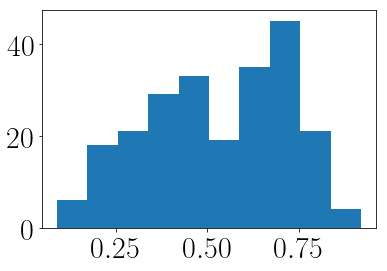

In [67]:
plt.hist(lst)